# 5.3 Using matplotlib with pandas
The `matplotlib` and `pandas` libraries work well together for producing ad-hoc visualizations. Similarly to how we used Python lists to create plots in the previous reading, we can also use Series objects (dataframe columns) as the input data to draw lines. This makes it extremely easy to create visualizations and explore the data as you are manipulating it.

### About the data

The data used in this notebook shows information about passengers on the *Titanic* cruiseliner, a ship which set out from Southampton, U.K. to sail across the Atlantic ocean and which tragically sank upon collision with an iceberg. The dataset contains information about each passenger's passenger class, name, sex, age, siblings, parents/children, ticket number, ticket fare, cabin number, and the embarked location. It also contains information about each passenger's survival status. This data set is extremely popular among data scientists and will facilitate demonstrations of Pandas concepts.

### Import the libraries
In order to use both pandas and matplotlib, we will need to import both libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import the data
To use data from a pandas dataframe to make matplotlib graphs, we can import the data from a CSV file in the same way that we have done previously.

In [6]:
df = pd.read_csv('./data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Looking at the data
Great! It looks like we are ready to start graphing the Titanic data. We'll just make a basic linechart

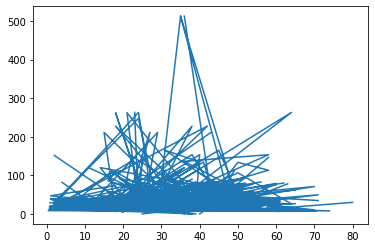

In [7]:
plt.plot(df['Age'], df['Fare']) # Maybe titanic data set isn't the best for showing line chart?

In [9]:
df_sorted = df.sort_values(by="Age")

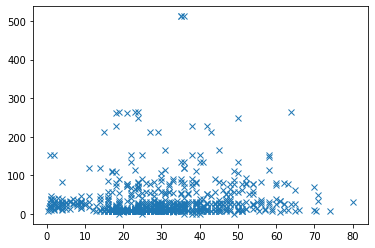

In [14]:
plt.plot(df_sorted['Age'], df_sorted['Fare'], linestyle="", marker='x')

In [11]:
df[df['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
